id : 샘플 아이디
Year_Birth : 고객 생년월일
Education : 고객 학력
Marital_status : 고객 결혼 상태
Income : 고객 연간 가구 소득
Kidhome : 고객 가구의 자녀 수
Teenhome : 고객 가구의 청소년 수
Dt_Customer : 고객이 회사에 등록한 날짜
Recency : 고객의 마지막 구매 이후 일수
NumDealsPurchases : 할인된 구매 횟수
NumWebPurchases : 회사 웹사이트를 통한 구매 건수
NumCatalogPurchases : 카탈로그를 사용한 구매 수 
NumStorePuchases : 매장에서 직접 구매한 횟수
NumWebVisitsMonth : 지난 달 회사 웹사이트 방문 횟수
AcceptedCmp1: 고객이 첫 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
AcceptedCmp2: 고객이 두 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
AcceptedCmp3: 고객이 세 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
AcceptedCmp4: 고객이 네 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
AcceptedCmp5: 고객이 5번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
Complain : 고객이 지난 2년 동안 불만을 제기한 경우 1, 그렇지 않은 경우 0
Response : 고객이 마지막 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
target : 고객의 제품 총 소비량

## 라이브러리

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 
pd.set_option('mode.chained_assignment',  None)

## 경로 설정

In [6]:
import os 
os.chdir("C:\\Users\\82107\\OneDrive\\바탕 화면\\python data")
os.getcwd()

'C:\\Users\\82107\\OneDrive\\바탕 화면\\python data'

## 데이터 불러오기

In [7]:
df=pd.read_csv('train.csv')
df.head()

,id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target
0,0,1974,Master,Together,46014.0,1,1,21-01-2013,21,10,...,8,7,0,0,0,0,0,0,0,541
1,1,1962,Graduation,Single,76624.0,0,1,24-05-2014,68,1,...,7,1,1,0,0,0,0,0,0,899
2,2,1951,Graduation,Married,75903.0,0,1,08-04-2013,50,2,...,9,3,0,0,0,0,0,0,0,901
3,3,1974,Basic,Married,18393.0,1,0,29-03-2014,2,2,...,3,8,0,0,0,0,0,0,0,50
4,4,1946,PhD,Together,64014.0,2,1,10-06-2014,56,7,...,5,7,0,0,0,1,0,0,0,444


In [8]:
## 데이터 행렬 확인
df.shape

(1108, 22)

In [9]:
## 데이터 타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1108 non-null   int64  
 1   Year_Birth           1108 non-null   int64  
 2   Education            1108 non-null   object 
 3   Marital_Status       1108 non-null   object 
 4   Income               1108 non-null   float64
 5   Kidhome              1108 non-null   int64  
 6   Teenhome             1108 non-null   int64  
 7   Dt_Customer          1108 non-null   object 
 8   Recency              1108 non-null   int64  
 9   NumDealsPurchases    1108 non-null   int64  
 10  NumWebPurchases      1108 non-null   int64  
 11  NumCatalogPurchases  1108 non-null   int64  
 12  NumStorePurchases    1108 non-null   int64  
 13  NumWebVisitsMonth    1108 non-null   int64  
 14  AcceptedCmp3         1108 non-null   int64  
 15  AcceptedCmp4         1108 non-null   i

In [10]:
## 결측치 확인
df.isnull()

,id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1104,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1105,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1106,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
## 결측치 확인
df.isnull().sum()

id                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
target                 0
dtype: int64

In [12]:
## Marital_Status 고유값 확인
df['Marital_Status'].value_counts()  

Married     415
Together    296
Single      234
Divorced    120
Widow        39
Alone         2
YOLO          1
Absurd        1
Name: Marital_Status, dtype: int64

## Dt_Customer의 연도, 월, 일 분리

In [14]:
def yy(df):
    return df.split('-')[2]
df['year']=df['Dt_Customer'].apply(yy)

In [15]:
def mm(df):
    return df.split('-')[1]
df['month']=df['Dt_Customer'].apply(mm)

In [16]:
def dd(df):
    return df.split('-')[0]
df['day']=df['Dt_Customer'].apply(dd)

In [17]:
df=df.drop('Dt_Customer', axis=1)

In [18]:
df['year']=pd.to_numeric(df['year'])
df['month']=pd.to_numeric(df['month'])
df['day']=pd.to_numeric(df['day'])

In [19]:
df

,id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target,year,month,day
0,0,1974,Master,Together,46014.0,1,1,21,10,7,...,0,0,0,0,0,0,541,2013,1,21
1,1,1962,Graduation,Single,76624.0,0,1,68,1,5,...,0,0,0,0,0,0,899,2014,5,24
2,2,1951,Graduation,Married,75903.0,0,1,50,2,6,...,0,0,0,0,0,0,901,2013,4,8
3,3,1974,Basic,Married,18393.0,1,0,2,2,3,...,0,0,0,0,0,0,50,2014,3,29
4,4,1946,PhD,Together,64014.0,2,1,56,7,8,...,0,0,1,0,0,0,444,2014,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,1103,1956,Graduation,Together,46097.0,0,1,11,5,3,...,0,0,0,0,0,0,241,2013,3,31
1104,1104,1986,Graduation,Married,23477.0,1,0,39,3,3,...,0,0,0,0,0,0,147,2013,10,21
1105,1105,1975,Master,Married,37368.0,1,0,4,1,1,...,0,0,0,0,0,0,30,2013,12,16
1106,1106,1974,Graduation,Divorced,53034.0,1,1,30,8,6,...,0,0,0,0,0,0,447,2013,5,30


## age 변수 생성

In [20]:
df['age']=2022-df['Year_Birth']
df=df.drop('Year_Birth', axis=1)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1108 non-null   int64  
 1   Education            1108 non-null   object 
 2   Marital_Status       1108 non-null   object 
 3   Income               1108 non-null   float64
 4   Kidhome              1108 non-null   int64  
 5   Teenhome             1108 non-null   int64  
 6   Recency              1108 non-null   int64  
 7   NumDealsPurchases    1108 non-null   int64  
 8   NumWebPurchases      1108 non-null   int64  
 9   NumCatalogPurchases  1108 non-null   int64  
 10  NumStorePurchases    1108 non-null   int64  
 11  NumWebVisitsMonth    1108 non-null   int64  
 12  AcceptedCmp3         1108 non-null   int64  
 13  AcceptedCmp4         1108 non-null   int64  
 14  AcceptedCmp5         1108 non-null   int64  
 15  AcceptedCmp1         1108 non-null   i

## Marital_Status 데이터 확인

In [22]:
df[df['Marital_Status'].str.contains('YOLO')]  ##df[df['Marital_Status']=='YOLO']

,id,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target,year,month,day,age
292,292,PhD,YOLO,48432.0,0,1,3,5,7,1,...,0,0,0,0,0,424,2012,10,18,49


In [23]:
df[df['Marital_Status'].str.contains('Alone')]

,id,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target,year,month,day,age
272,272,PhD,Alone,35860.0,1,1,37,2,1,1,...,0,0,0,0,1,49,2014,5,19,49
606,606,Graduation,Alone,34176.0,1,0,12,4,3,0,...,0,0,0,0,0,89,2014,5,12,34


In [24]:
df[df['Marital_Status'].str.contains('Single')]

,id,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target,year,month,day,age
1,1,Graduation,Single,76624.0,0,1,68,1,5,10,...,0,0,0,0,0,899,2014,5,24,60
5,5,Graduation,Single,47958.0,0,1,8,2,6,3,...,0,0,0,0,0,407,2013,1,19,70
6,6,Graduation,Single,22804.0,1,0,75,1,2,0,...,0,0,0,0,0,26,2013,7,31,51
9,9,Graduation,Single,61823.0,0,1,26,4,8,2,...,0,0,0,0,0,884,2013,2,18,70
18,18,Master,Single,91712.0,0,0,47,0,9,7,...,1,0,0,0,1,2217,2013,10,17,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,1088,Graduation,Single,61825.0,0,1,56,1,4,2,...,0,0,0,0,0,424,2013,8,7,43
1090,1090,Graduation,Single,38643.0,1,1,45,2,2,0,...,0,0,0,1,0,49,2013,11,29,44
1092,1092,PhD,Single,74004.0,0,0,5,1,4,6,...,1,1,0,0,1,1658,2014,2,24,35
1100,1100,Master,Single,55284.0,0,1,60,3,7,5,...,0,0,0,0,0,764,2012,12,24,66


In [25]:
df[df['Marital_Status'].str.contains('Widow')]

,id,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target,year,month,day,age
7,7,Graduation,Widow,54162.0,1,1,31,1,1,0,...,0,0,0,0,0,42,2013,3,18,44
69,69,Master,Widow,47570.0,1,1,3,3,2,2,...,0,0,0,0,1,121,2013,5,29,73
83,83,Master,Widow,44551.0,0,1,24,2,4,1,...,0,0,0,0,0,285,2013,8,31,68
87,87,Graduation,Widow,72643.0,0,0,60,1,3,10,...,0,1,0,0,1,1429,2013,2,27,73
93,93,Graduation,Widow,31880.0,1,0,13,1,1,0,...,0,0,0,0,0,15,2012,10,31,52
186,186,2n Cycle,Widow,74859.0,0,0,63,1,6,5,...,0,1,0,0,0,1565,2013,6,3,73
190,190,Graduation,Widow,42429.0,0,1,99,2,1,1,...,0,0,0,0,0,67,2014,2,11,49
210,210,PhD,Widow,82032.0,0,0,54,0,4,6,...,0,0,0,0,0,1234,2014,4,5,74
270,270,PhD,Widow,25358.0,0,1,57,2,1,0,...,0,0,0,0,0,32,2013,7,22,75
285,285,Graduation,Widow,63285.0,0,0,84,1,6,5,...,0,0,0,0,0,1103,2013,11,5,77


In [26]:
df[df['Marital_Status'].str.contains('Absurd')]

,id,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target,year,month,day,age
677,677,Graduation,Absurd,79244.0,0,0,58,1,4,10,...,1,1,0,0,1,1216,2012,12,19,29


In [27]:
## Yolo와 alone은 single로 대체될 수 있고 absurds는 잘 모르겠어서 없앰
## Yolo와 alone은 single과 합치고 absurd는 없애자

In [28]:
df1=df.copy()

In [29]:
df1.drop([677], inplace=True) # absurd 삭제

In [30]:
df1.replace('YOLO','Single', inplace=True)     # YOLO->Single   # df1.loc[292, 'Marial_Status']='Single'  # df1.iloc[292]['Marital_Status']='Single' 

In [31]:
df1[df1['Marital_Status']=='YOLO']  # 잘 바뀌었는지 확인

,id,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target,year,month,day,age


In [32]:
df1.replace('Alone','Single', inplace=True) # Alone->Single 

In [33]:
df1[df1['Marital_Status']=='Alone'] # 잘 바뀌었는지 확인

,id,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target,year,month,day,age


## child 변수 생성 (Kidhome+Teenhome)

In [34]:
df1['child']=df1['Kidhome']+df1['Teenhome']

In [35]:
## Kidhome, Teenhome 삭제
df1=df1.drop('Kidhome', axis=1)
df1=df1.drop('Teenhome', axis=1)

## Marital_Status 숫자로 변환

In [36]:
df1['Marital_Status'].unique()

array(['Together', 'Single', 'Married', 'Widow', 'Divorced'], dtype=object)

In [37]:
# Marital_Status 숫자로 바꾸기
# 0 = Single, Widow, Divorced  1 = Married, Together
df1.replace('Together',1, inplace=True)
df1.replace('Married',1, inplace=True)
df1.replace('Single',0, inplace=True)
df1.replace('Widow',0, inplace=True)
df1.replace('Divorced',0, inplace=True )

In [38]:
df1['Marital_Status'].unique()

array([1, 0], dtype=int64)

## Education 숫자로 변환

In [39]:
df1['Education'].unique()

array(['Master', 'Graduation', 'Basic', 'PhD', '2n Cycle'], dtype=object)

In [40]:
# 숫자로 바꾸기
# Basic = 1, 2nCycle = 2, Graduation = 3, Master = 4, PhD = 5
df1.replace('PhD',5, inplace=True)
df1.replace('Master',4, inplace=True)
df1.replace('Graduation',3, inplace=True)
df1.replace('2n Cycle',2, inplace=True)
df1.replace('Basic',1, inplace=True )

In [41]:
df1['Education'].unique()

array([4, 3, 1, 5, 2], dtype=int64)

## AcceptedCmp 변수 생성 (AcceptedCmp1+2+3+4+5+Response)

In [42]:
## AcceptedCmp1,2,3,4,5와 Response 모두 더하기 
df1['AcceptedCmp']=df1['AcceptedCmp1']+df1['AcceptedCmp2']+df1['AcceptedCmp3']+df1['AcceptedCmp4']+df1['AcceptedCmp5']+df1['Response']

In [43]:
## AcceptedCmp1,2,3,4,5와 Response 제거하기
df1=df1.drop('AcceptedCmp1', axis=1)
df1=df1.drop('AcceptedCmp2', axis=1)
df1=df1.drop('AcceptedCmp3', axis=1)
df1=df1.drop('AcceptedCmp4', axis=1)
df1=df1.drop('AcceptedCmp5', axis=1)
df1=df1.drop('Response', axis=1)

In [44]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1107 entries, 0 to 1107
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1107 non-null   int64  
 1   Education            1107 non-null   int64  
 2   Marital_Status       1107 non-null   int64  
 3   Income               1107 non-null   float64
 4   Recency              1107 non-null   int64  
 5   NumDealsPurchases    1107 non-null   int64  
 6   NumWebPurchases      1107 non-null   int64  
 7   NumCatalogPurchases  1107 non-null   int64  
 8   NumStorePurchases    1107 non-null   int64  
 9   NumWebVisitsMonth    1107 non-null   int64  
 10  Complain             1107 non-null   int64  
 11  target               1107 non-null   int64  
 12  year                 1107 non-null   int64  
 13  month                1107 non-null   int64  
 14  day                  1107 non-null   int64  
 15  age                  1107 non-null   i

In [45]:
df1

,id,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,target,year,month,day,age,child,AcceptedCmp
0,0,4,1,46014.0,21,10,7,1,8,7,0,541,2013,1,21,48,2,0
1,1,3,0,76624.0,68,1,5,10,7,1,0,899,2014,5,24,60,1,1
2,2,3,1,75903.0,50,2,6,6,9,3,0,901,2013,4,8,71,1,0
3,3,1,1,18393.0,2,2,3,0,3,8,0,50,2014,3,29,48,1,0
4,4,5,1,64014.0,56,7,8,2,5,7,0,444,2014,6,10,76,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,1103,3,1,46097.0,11,5,3,1,6,4,0,241,2013,3,31,66,1,0
1104,1104,3,1,23477.0,39,3,3,0,4,8,0,147,2013,10,21,36,1,0
1105,1105,4,1,37368.0,4,1,1,0,2,6,0,30,2013,12,16,47,1,1
1106,1106,3,0,53034.0,30,8,6,1,7,8,0,447,2013,5,30,48,2,0


## 시각화

- Eduation

<AxesSubplot:xlabel='Education', ylabel='count'>

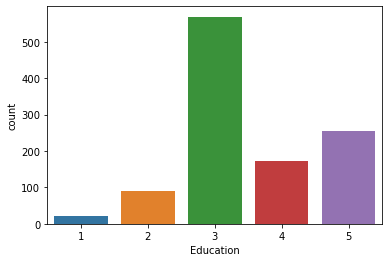

In [47]:
sns.countplot(x='Education', data=df1) 

- Marital_Status

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

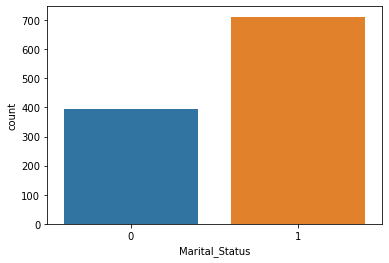

In [48]:
sns.countplot(x='Marital_Status', data=df1) 

- child

<AxesSubplot:xlabel='child', ylabel='count'>

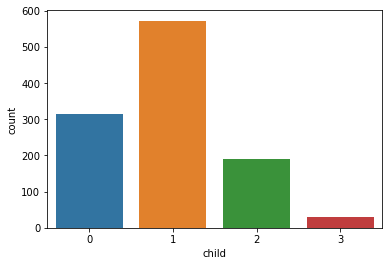

In [49]:
sns.countplot(x='child', data=df1) ## teenhome의 그래프와 유사

- NumDealsPurchases

<AxesSubplot:xlabel='NumDealsPurchases', ylabel='count'>

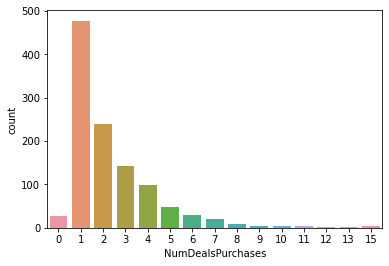

In [50]:
sns.countplot(x='NumDealsPurchases', data=df1)

- NumWebPurchases

<AxesSubplot:xlabel='NumWebPurchases', ylabel='count'>

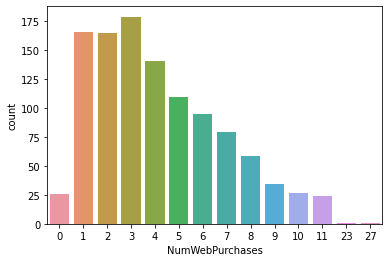

In [51]:
sns.countplot(x='NumWebPurchases', data=df1)

- NumCatalogPurchases

<AxesSubplot:xlabel='NumCatalogPurchases', ylabel='count'>

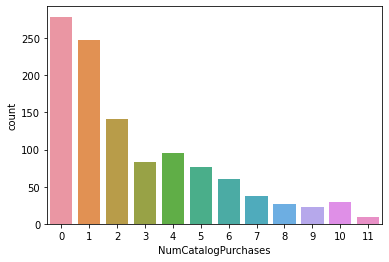

In [52]:
sns.countplot(x='NumCatalogPurchases', data=df1)

- NumStorePurchases

<AxesSubplot:xlabel='NumStorePurchases', ylabel='count'>

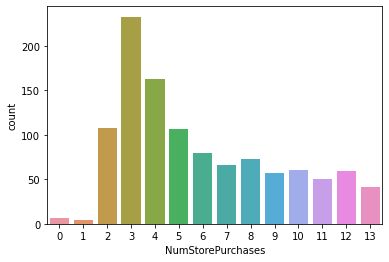

In [53]:
sns.countplot(x='NumStorePurchases', data=df1)

- NumWebvisitsMonth

<AxesSubplot:xlabel='NumWebVisitsMonth', ylabel='count'>

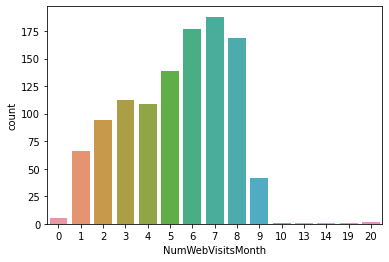

In [54]:
sns.countplot(x='NumWebVisitsMonth', data=df1)

- Complain

<AxesSubplot:xlabel='Complain', ylabel='count'>

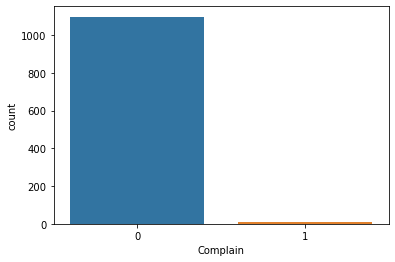

In [55]:
sns.countplot(x='Complain', data=df1)

- AcceptedCmp

<AxesSubplot:xlabel='AcceptedCmp', ylabel='count'>

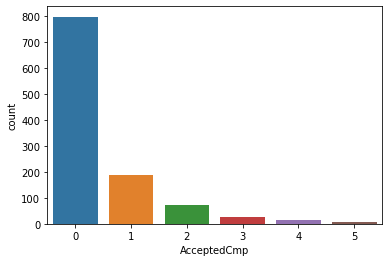

In [56]:
sns.countplot(x='AcceptedCmp', data=df1)

- target

<AxesSubplot:xlabel='target'>

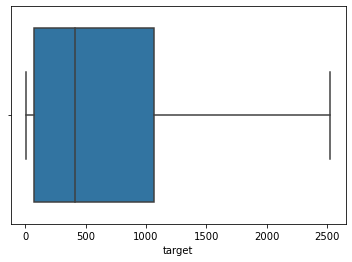

In [57]:
sns.boxplot(x='target', data=df1)

- age

<AxesSubplot:xlabel='age'>

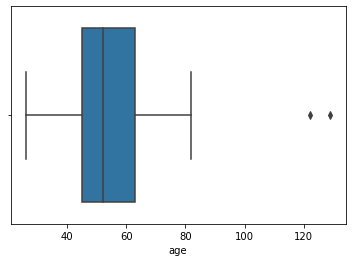

In [58]:
sns.boxplot(x='age', data=df1)

- Recency

<AxesSubplot:xlabel='Recency'>

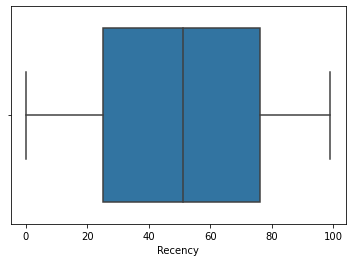

In [59]:
sns.boxplot(x='Recency', data=df1)

- Income

<AxesSubplot:xlabel='Income'>

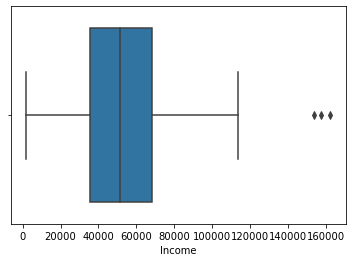

In [60]:
sns.boxplot(x='Income', data=df1)

## 이상치 제거

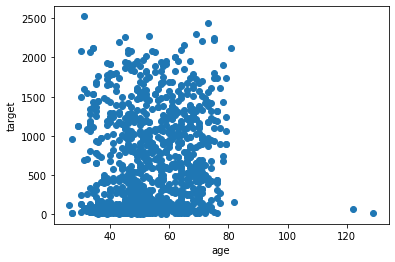

In [61]:
## age 이상치 제거
plt.scatter(df1['age'], df1['target'])
plt.xlabel('age')
plt.ylabel('target')
plt.show()

In [62]:
df1['age']<=100
df1 = df1[df1['age']<=100]

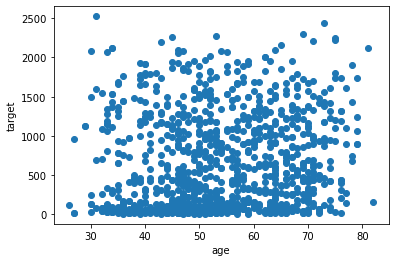

In [63]:
## 이상치 제거되었는지 확인
plt.scatter(df1['age'], df1['target'])
plt.xlabel('age')
plt.ylabel('target')
plt.show()

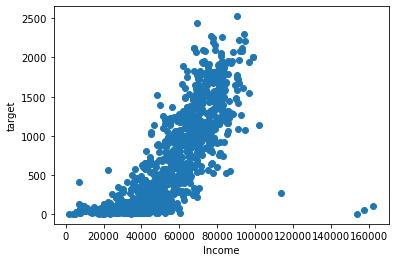

In [64]:
## Income 이상치 제거
plt.scatter(df1['Income'], df1['target'])
plt.xlabel('Income')
plt.ylabel('target')
plt.show()

In [65]:
df1['Income']<=140000
df1 = df1[df1['Income']<=140000]

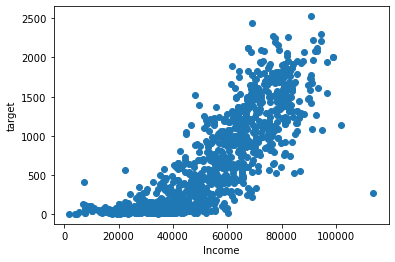

In [66]:
## 이상치 제거되었는지 확인
plt.scatter(df1['Income'], df1['target'])
plt.xlabel('Income')
plt.ylabel('target')
plt.show()

In [67]:
# output data -> target  input data -> 그 외

In [70]:
df1.dtypes

id                       int64
Education                int64
Marital_Status           int64
Income                 float64
Recency                  int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Complain                 int64
target                   int64
year                     int64
month                    int64
day                      int64
age                      int64
child                    int64
AcceptedCmp              int64
dtype: object

## Logistic Regression

In [65]:
x=df1.drop('id', axis=1)
y=df1['target']

x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3)

In [67]:
x_train.shape

(771, 17)

In [69]:
x_test.shape

(331, 17)

In [70]:
## 데이터 정규화하기
from sklearn.preprocessing import StandardScaler

normalizer=StandardScaler()
x_train=normalizer.fit_transform(x_train)
x_test=normalizer.transform(x_test)

In [71]:
model=LogisticRegression()

model.fit(x_train, y_train)

C:\Users\82107\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [72]:
# train set 정확도
print(model.score(x_train, y_train))

0.7652399481193255


In [73]:
# test set 정확도
print(model.score(x_test, y_test))

0.07250755287009064


In [74]:
import numpy as np
from sklearn.metrics import mean_squared_error

def nmae(true, pred):
    mae=np.mean(np.abs(true-pred))
    score=mae/np.mean(np.abs(true))
    return score
y_hat=model.predict(x_test)
print(f'모델 NMAE:{nmae(y_test, y_hat)}')

모델 NMAE:0.261802932545573


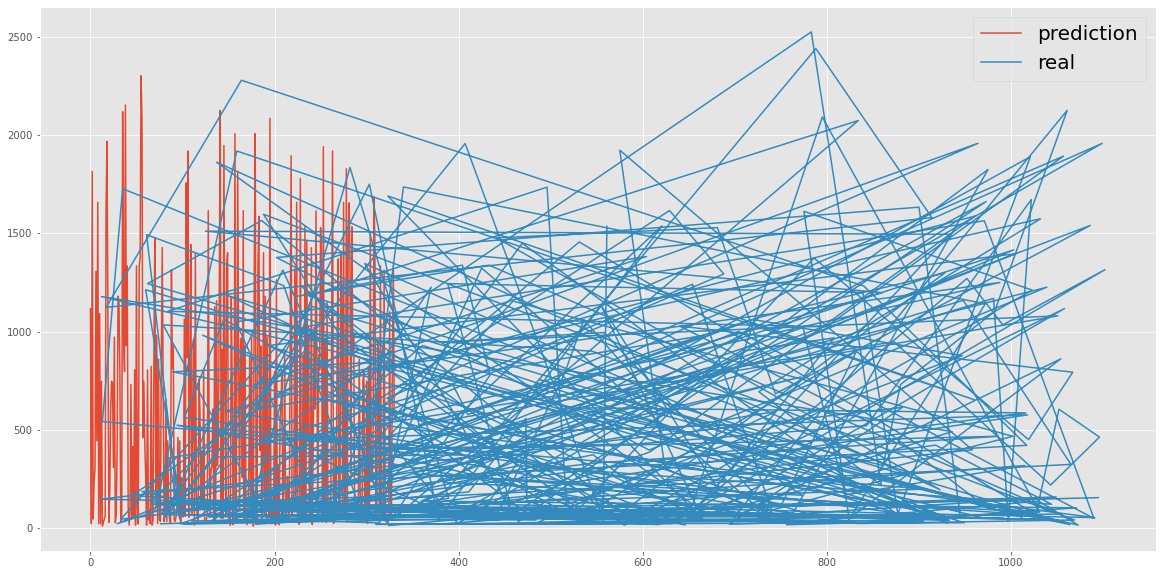

In [75]:
plt.style.use('ggplot')
plt.figure(figsize=(20, 10))
plt.plot(y_hat, label='prediction')
plt.plot(y_test, label='real')
plt.legend(fontsize=20)
plt.show()